In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load in tons (uniform distribution between 5 and 20 tons)
load = np.random.uniform(5, 20, size=100) 

# Fuel efficiency in L/100km (higher value means lower efficiency)
# Generally increasing fuel consumption with increasing load
fuel_efficiency = np.random.normal(30 + 0.5 * load, 2) 

# Introducing some outliers in fuel efficiency
outlier_efficiency = [50, 55, 15, 10]  # Extremely high and low fuel efficiencies
outlier_load = np.random.uniform(5, 20, size=len(outlier_efficiency))
load = np.append(load, outlier_load)
fuel_efficiency = np.append(fuel_efficiency, outlier_efficiency)

# Creating a DataFrame
data = pd.DataFrame({'Load': load, 'Fuel Efficiency (L/100km)': fuel_efficiency})

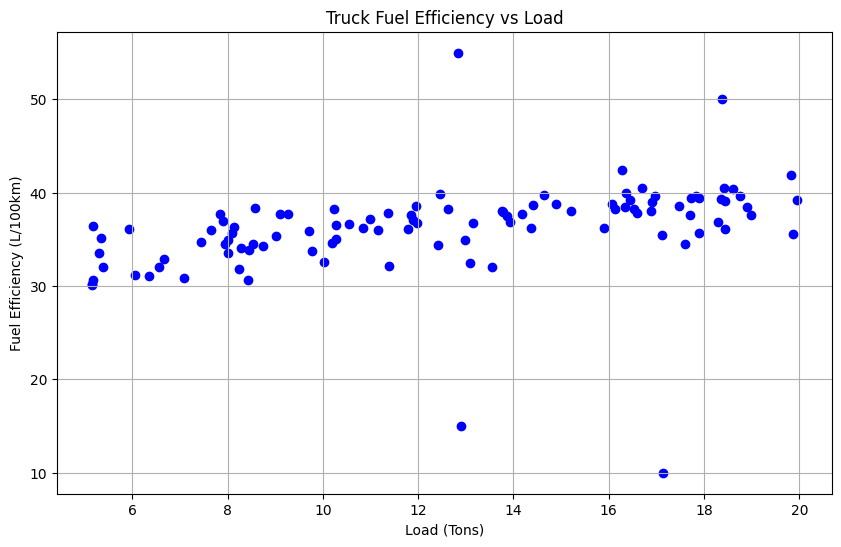

In [10]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Load'], data['Fuel Efficiency (L/100km)'], color='blue')
plt.title('Truck Fuel Efficiency vs Load')
plt.xlabel('Load (Tons)')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.grid(True)
plt.show()

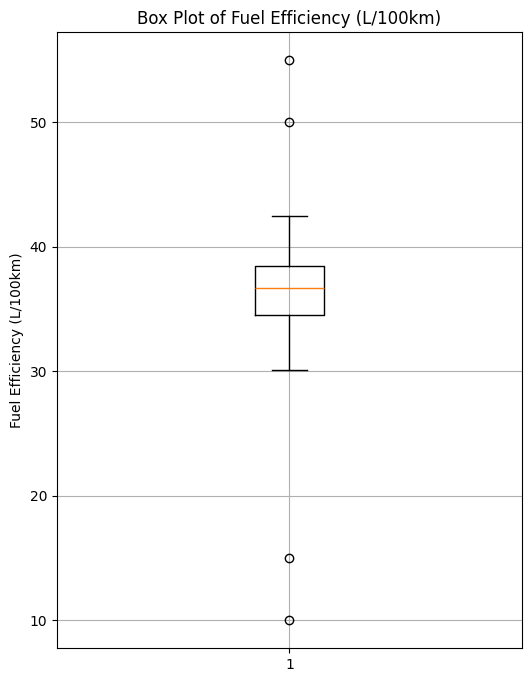

In [11]:
# Box Plot
plt.figure(figsize=(6, 8))
plt.boxplot(data['Fuel Efficiency (L/100km)'], vert=True)
plt.title('Box Plot of Fuel Efficiency (L/100km)')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.grid(True)
plt.show()

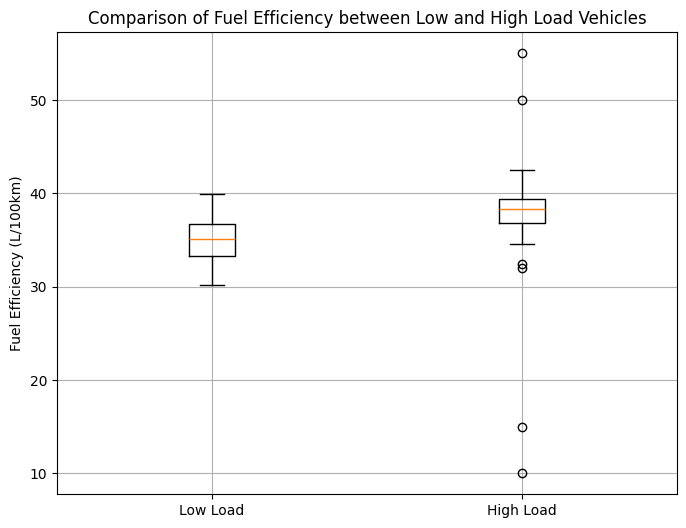

In [12]:
# Defining the threshold for low and high load (e.g., median of the load)
load_threshold = np.median(data['Load'])

# Splitting the dataset
low_load_data = data[data['Load'] <= load_threshold]
high_load_data = data[data['Load'] > load_threshold]


# Creating a single box plot with two boxes, one for low load and one for high load vehicles

# Preparing data for the box plot
box_data = [low_load_data['Fuel Efficiency (L/100km)'], high_load_data['Fuel Efficiency (L/100km)']]

# Creating the Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(box_data, vert=True, labels=['Low Load', 'High Load'])
plt.title('Comparison of Fuel Efficiency between Low and High Load Vehicles')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.grid(True)
plt.show()

In [13]:
# IQR Method
# Calculating IQR
Q1 = data['Fuel Efficiency (L/100km)'].quantile(0.25)
Q3 = data['Fuel Efficiency (L/100km)'].quantile(0.75)
IQR = Q3 - Q1
# Determining the whisker length (1.5 times IQR above Q3 and below Q1)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
# Finding outliers (values outside the fence)
iqr_outliers = data[(data['Fuel Efficiency (L/100km)'] < lower_whisker) | (data['Fuel Efficiency (L/100km)'] > upper_whisker)].index

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)
print("Outliers:", iqr_outliers)

Q1: 34.52838235096706
Q3: 38.48923646890549
IQR: 3.960854117938432
Lower whisker: 28.58710117405941
Upper whisker: 44.43051764581314
Outliers: Index([100, 101, 102, 103], dtype='int64')


In [14]:
from scipy import stats
# Z-score Method
# Calculating Z-scores of the fuel efficiency
z_scores = stats.zscore(data['Fuel Efficiency (L/100km)'])
# Finding outliers (where z-score is greater than 3 or less than -3)
z_score_outliers = np.where((z_scores > 3) | (z_scores < -3))[0]
print("Z-score outliers:", z_score_outliers)

Z-score outliers: [101 102 103]


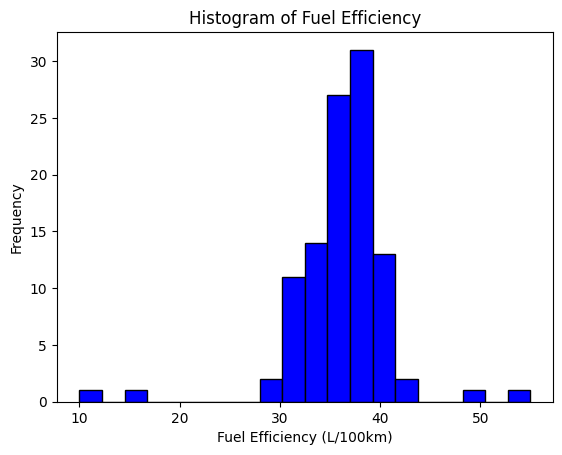

In [15]:
# Creating the histogram for fuel efficiency
plt.hist(fuel_efficiency, bins=20, color='blue', edgecolor='black')
plt.xlabel('Fuel Efficiency (L/100km)')
plt.ylabel('Frequency')
plt.title('Histogram of Fuel Efficiency')
plt.show()